# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')

# return the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The dataset has 9 columns as mentioned in the Data Dictionary above. Each row in the dataset corresponds to an order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# use the shape command to determine the number of rows and columns in the dataset

df.shape

(1898, 9)

#### Observations:

The dataset has **1898 rows** and **9 columns**.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# use info() to print a concise summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

We notice that the dataset has 3 types of variables:

a) 2 numeric: **integer** and **float**

b) 1 string: **object**

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# check if the dataset has any missing values

df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

The dataset does not have any missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# conduct a statistical summary of the dataset, first for **categorical variables** 

df.describe(exclude = 'number')

,restaurant_name,cuisine_type,day_of_the_week,rating
count,1898,1898,1898,1898
unique,178,14,2,4
top,Shake Shack,American,Weekend,Not given
freq,219,584,1351,736


In [7]:
# ... then for **numerical variables**

df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

From the tables above, we note that it takes **at least 20mins** and **at most 35mins** to prepare the food once an order is placed.

And it takes **on average just over 27mins** to prepare the food after the order is placed.

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# determine how many orders did not receive a rating

df['rating'].value_counts()['Not given']

736

#### Observations:

We note that **736 (out of 1898) orders** were not given a rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [9]:
# start the univariate analysis by looking at the **categorial variables** (for the moment we exclude 'rating')

df.describe(exclude = 'number')

,restaurant_name,cuisine_type,day_of_the_week,rating
count,1898,1898,1898,1898
unique,178,14,2,4
top,Shake Shack,American,Weekend,Not given
freq,219,584,1351,736


#### Observations:

Given that **day_of_the_week** and **rating** have a few unique categories, we will visualize the data only for these 2 categorical variables.

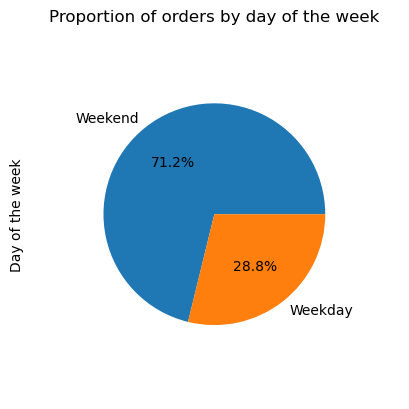

In [10]:
# use a pie chart to examine the proportion of orders made during the week and over the weekend

df.day_of_the_week.value_counts().plot(kind = 'pie', autopct = '%.1f%%', radius = .75)
plt.title('Proportion of orders by day of the week')
plt.ylabel('Day of the week')


plt.show()

#### Observations:

We note that **most orders are made over the weekend**, with 71.2% of the total orders.

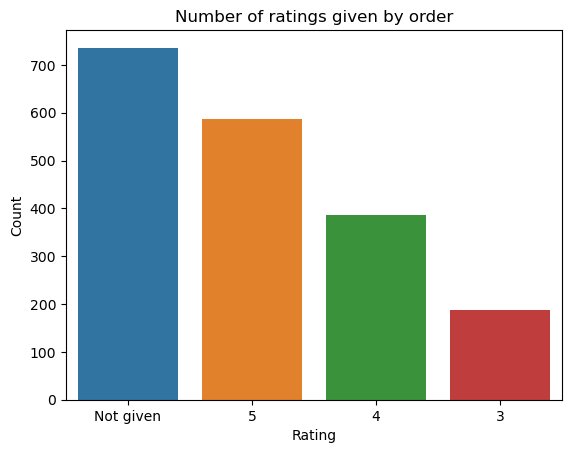

In [11]:
# now examine the number of ratings given by order

sns.countplot(data = df, x = df.rating.sort_values(ascending = False))
plt.title('Number of ratings given by order')
plt.ylabel('Count')
plt.xlabel('Rating')

plt.show()

#### Observations:

We can see that most orders are not rated. However, of the orders that are rated, most of them received the highest rating of 5.

In [12]:
# conduct the univariate analysis for the **numerical variables** for which we can draw insights:

df.describe(include = 'number')

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


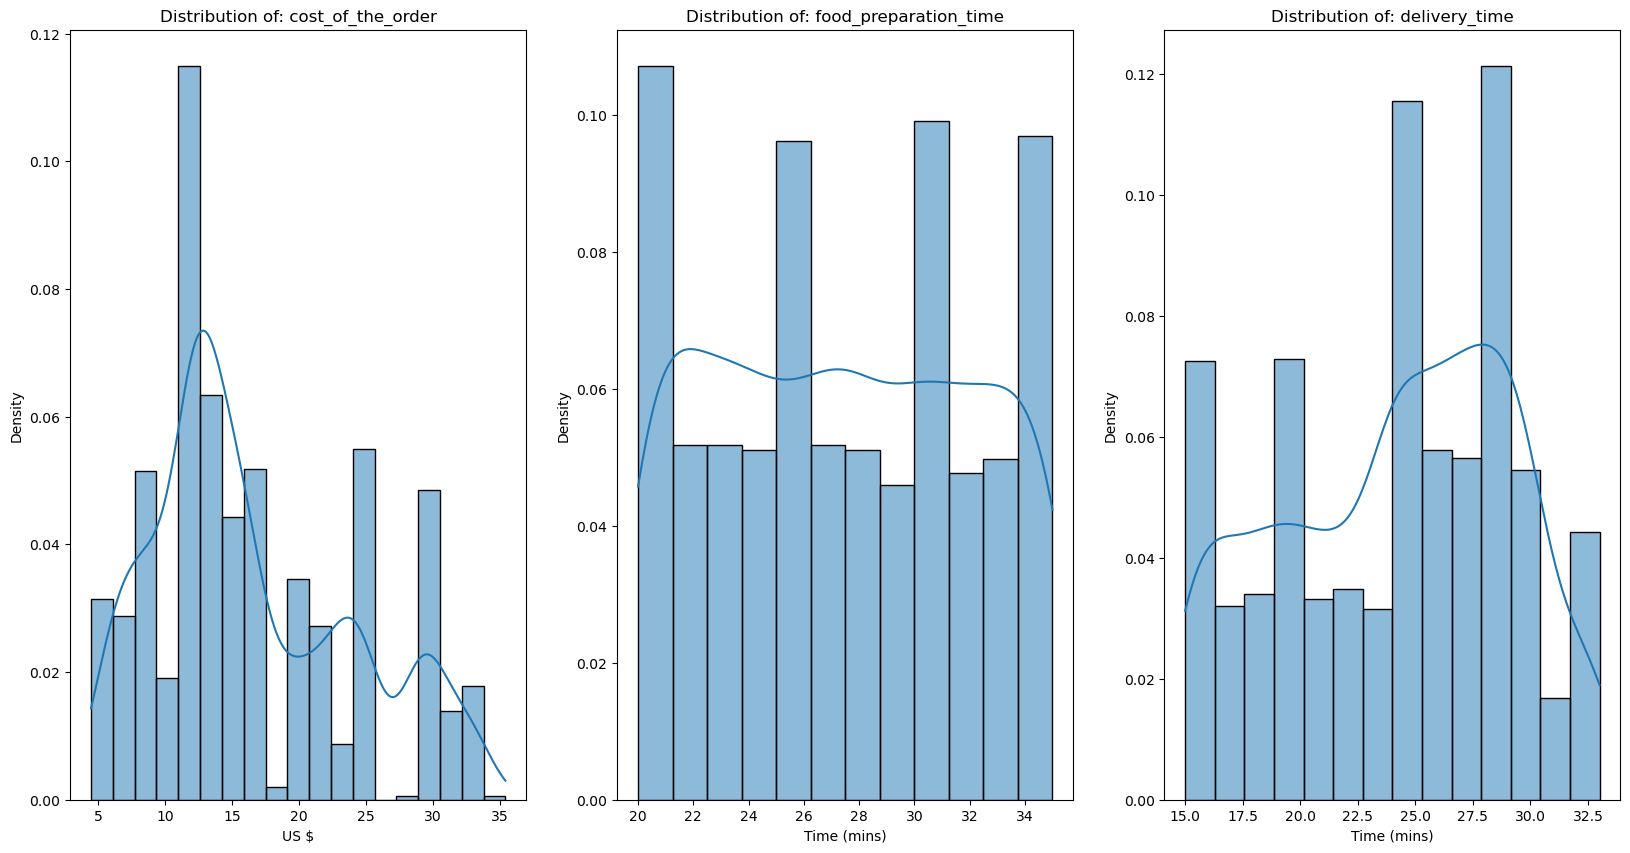

In [13]:
# plot the histogram for 'cost of order', 'food preparation time' and 'delivery time'

cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
x = ['US $','Time (mins)','Time (mins)']

# create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(20,10))

for col, ax, xlabel in zip(cols, axes, x):
    sns.histplot(data=df[col], kde=True, stat='density', ax=ax)
    ax.set_title('Distribution of: ' + str(col))
    ax.set_xlabel(str(xlabel))

plt.show()

#### Observations:

a. The **cost of the order** is right-skewed, with the peak of the cost between US 10 and US 15 dollars. 

b. **Food preparation time** appears to follow a uniform distribution between the values of 20 and 35 minutes.

c. The **delivery time** is left-skewed, with the peak of the delivery time around 28 minutes.

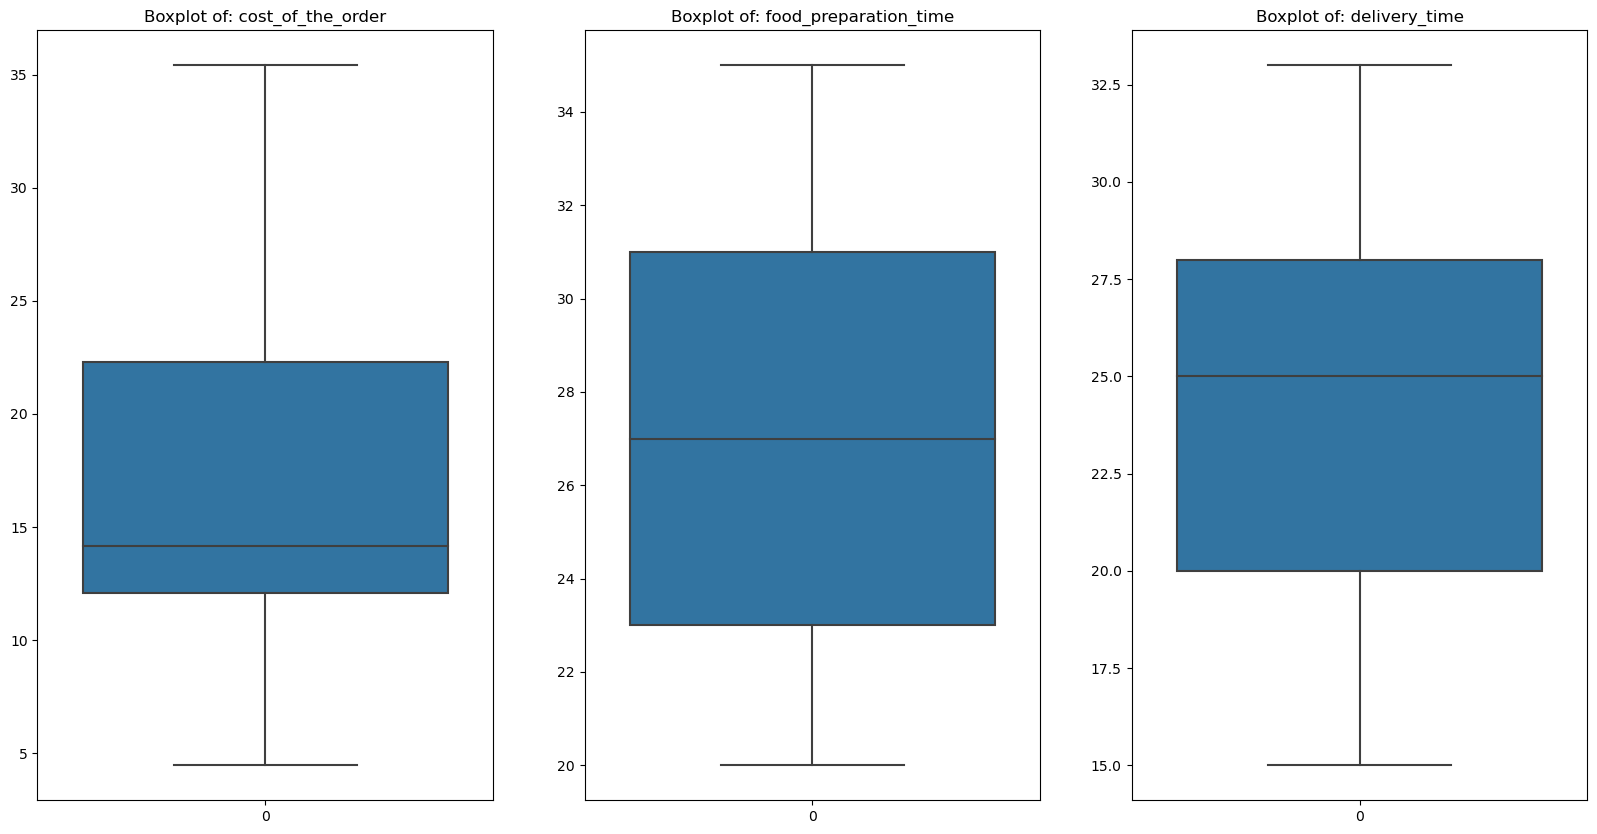

In [14]:
# plot the boxplots for these three variables

cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

# create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(20,10))

for col, ax in zip(cols, axes):
    sns.boxplot(data=df[col], ax=ax)
    ax.set_title('Boxplot of: ' + str(col))
    ax.set_xlabel("")

plt.show()

#### Observations:

a. The range of the **cost of order** is between US 5 and US 35 dollars, with the median at around US 15 dollars.

b. The range of the **food preparation time** is between 23 and 31 minutes, with the median at around 27 minutes.

c. The range of the **delivery time** is between 20 and 28 minutes, with the median at around 25 minutes.

**None of the boxplots display outliers**.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

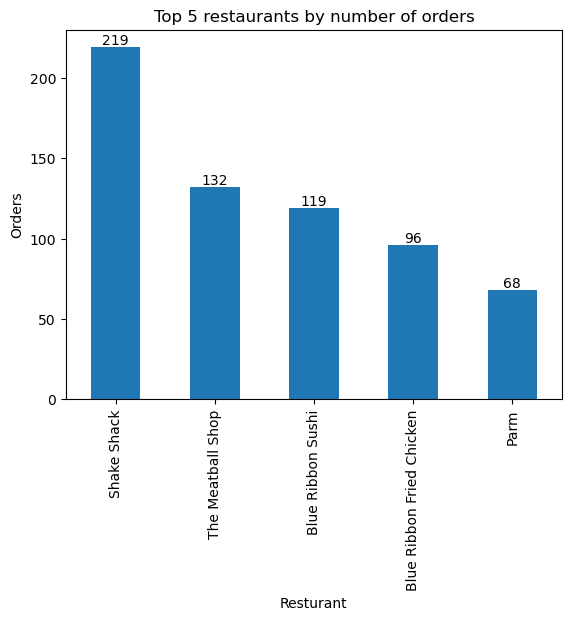

In [15]:
# look at the top 5 restaurants in terms of the number of orders received

top5 = df['restaurant_name'].value_counts().iloc[0:5].plot(kind='bar', legend = False)
plt.title('Top 5 restaurants by number of orders')
plt.xlabel('Resturant')
plt.ylabel('Orders')
top5.bar_label(top5.containers[0], label_type='edge')

plt.show()

#### Observations:

Among the **top 5 restaurants** by number of orders received, we note that **Shake Shack** topped the list with 219 orders, followed by **The Meatball Shop** with 132 orders.

**Parm** ranked in the 5th place with 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [16]:
# determine the most popular cuisine on weekends

df.groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

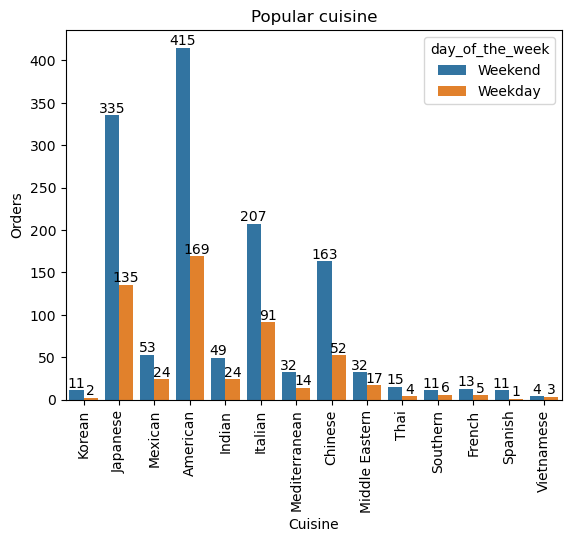

In [17]:
# ...and visualize the chart

popular_cuisine = sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week')
plt.title('Popular cuisine')
plt.xlabel('Cuisine')
plt.xticks(rotation=90)
plt.ylabel('Orders')
popular_cuisine.bar_label(popular_cuisine.containers[0], label_type='edge')
popular_cuisine.bar_label(popular_cuisine.containers[1], label_type='edge')

plt.show()

#### Observations:

We note from the table and chart above that **American** is the most popular cuisine on weekends, followed by **Japanese** and **Italian**.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [18]:
# determine the percentage of orders that cost more than US $20

Orders_over_usd20 = df[df['cost_of_the_order']>=20].count()['cost_of_the_order']

Total_orders = len(df['cost_of_the_order'])

print ('Number of orders over US $20 =', Orders_over_usd20)
print ('Total number of orders =', Total_orders)

print ('Percentage of orders that cost more than US $20 =', 100*Orders_over_usd20/Total_orders)

Number of orders over US $20 = 555
Total number of orders = 1898
Percentage of orders that cost more than US $20 = 29.24130663856691


#### Observations:

We observe that **the percentage of orders that cost more than US $20 is 29.2%**.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [19]:
# look at the mean of the order delivery time

df['delivery_time'].mean()

24.161749209694417

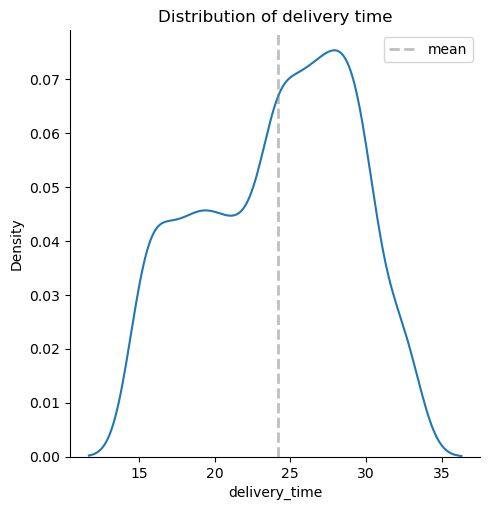

In [20]:
# visualize the density function

sns.displot(data = df['delivery_time'], kind = 'kde')
plt.axvline(x=df.delivery_time.mean(), linewidth=2, color='gray', label="mean", alpha=0.5, linestyle='--')
plt.title('Distribution of delivery time')
plt.legend()

plt.show()

#### Observations:

The **mean** order delivery time is **just above 24min**.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [21]:
# identify the top 3 most frequent customers in terms of orders placed

df['customer_id'].value_counts().sort_values(ascending = False).head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

Customer **#52832** made **13 orders**

Customer **#47440** made **10 orders**

Customer **#83287** made **9 orders**

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [22]:
# start the multivariate analysis by creating an indicator variable for the categorical variable day_of_the_week, which 
# takes the value of 1 if it is a weekday and 0 if it is over the weekend

conditions = [(df['day_of_the_week'] == 'Weekday'),
             (df['day_of_the_week'] == 'Weekend')]

values = [1,0]

df['weekday'] = np.select(conditions,values)

In [23]:
# show the first 5 rows to check how the new variable 'weekday' looks like

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,weekday
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,0
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,0
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,0
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1


In [24]:
# check if there are any missing values in the new variable 'weekday'

df.weekday.isnull().sum()

0

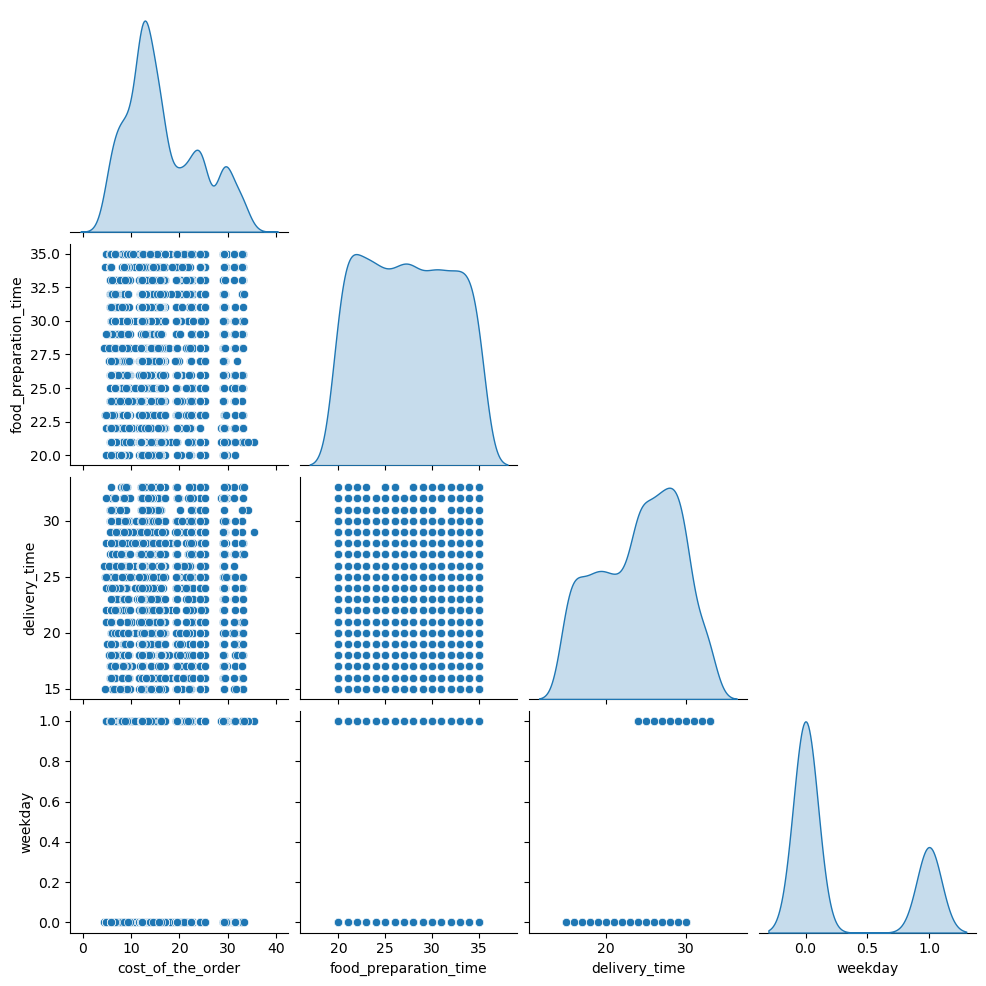

In [25]:
# show the pairplot to examine the distribution for each variable, and the scatterplot across variables

sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'weekday']], diag_kind = 'kde', corner = True)
plt.show()

#### Observations:

a. The **cost of the order** is not correlated with the **food preparation time**, **delivery time**, or **day of the week**.

b. The **food prepration time** is not correlated with the **delivery time** or **day of the week**.

c. However, the **delivery time** seems to be higher during the weekdays than weekends.

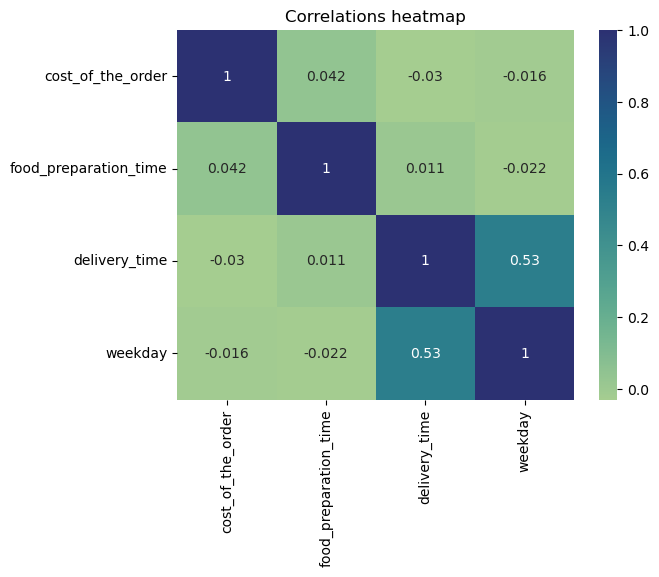

In [26]:
# compute the correlations between numeric variables and plot the corresponding heatmap

cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'weekday']

sns.heatmap(df.corr(numeric_only = True).loc[cols,cols], annot = True, cmap = 'crest')
plt.title('Correlations heatmap')

plt.show()

#### Observations:

There is a weak correlation (~ 0) across most variables, except for weekday and delivery time. According to our heatmap, **the delivery time is positively correlated with weekday**, suggesting that it takes longer to deliver the order on weekdays than over the weekend.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [27]:
# step 1: create a subset excluding orders that were not given a rating (call this dataset 'df_rating')

df_rating = df[~df["rating"].str.contains('Not given')]

In [28]:
# step 2: convert the data type to integer and examine the first elements of the subset

df_rating['rating'] = df_rating['rating'].astype('int')

df_rating.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,weekday
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,0
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,1
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,1


In [29]:
# step 3: create a dataset that meets the conditions for the restaurants to get the promotional offer

promo_rating = df_rating[df_rating.groupby('restaurant_name')['rating'].transform(lambda x: (x.sum()>= 50) & (x.mean()>= 4))]

In [30]:
# final step: count and print the list of restaurants

print('This is the number of restaurants that meet the conditions to get the promotional offer =',
      len(promo_rating['restaurant_name'].unique()))

This is the number of restaurants that meet the conditions to get the promotional offer = 25


In [31]:
print('List of restaurants:\n','\n'.join(promo_rating['restaurant_name'].unique()))

List of restaurants:
 Blue Ribbon Fried Chicken
Tamarind TriBeCa
Shake Shack
RedFarm Hudson
Blue Ribbon Sushi
Five Guys Burgers and Fries
Cafe Mogador
The Meatball Shop
Parm
Chipotle Mexican Grill $1.99 Delivery
RedFarm Broadway
TAO
Jack's Wife Freda
Sushi of Gari 46
Nobu Next Door
Han Dynasty
Rubirosa
Momoya
Blue Ribbon Sushi Bar & Grill
Blue Ribbon Sushi Izakaya
ilili Restaurant
The Smile
Bareburger
J. G. Melon
Sushi of Gari Tribeca


In [32]:
# compute the percentage of restaurants that meet the conditions for the promotional offer (exclude restaurants without ratings)

100*len(promo_rating['restaurant_name'].unique())/len(df_rating['restaurant_name'].unique())

16.025641025641026

#### Observations:

There are **25 restaurants** (see list above) that meet the conditions to get the promotional offer. This figure amounts to **16% of all the restaurants** (excluding those that have not been rated).

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [33]:
# step1: compute the revenue generated across all orders that cost more than 20 dollars

cost_over_20 = df[df['cost_of_the_order']>=20]['cost_of_the_order'].sum()
perc_over_20 = 0.25

revenue_over_20 = perc_over_20*cost_over_20

revenue_over_20

3688.7275

In [34]:
# step 2: compute the revenue generated across all orders that cost more than 5 dollars (but less than 20)

cost_between_5and20 = df[(df['cost_of_the_order']>=5) & (df['cost_of_the_order']<20)]['cost_of_the_order'].sum()
perc_beteween_5and20 = 0.15

revenue_between_5and20 = perc_beteween_5and20*cost_between_5and20

revenue_between_5and20

2477.5755000000004

In [35]:
# final step: print the value of total revenue given the rules set in step 1 and step 2

Total_revenue = revenue_over_20 + revenue_between_5and20
Total_revenue

6166.303

#### Observations:

We calculate that the revenues on the orders having cost greater than 20 dollars plus those having cost greater than 5 dollars is equal to **US 6,166.3 dollars**.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [36]:
# compute the total delivery time

order_time_delivery_over60 = len(df[(df['food_preparation_time'] + df['delivery_time'])>=60])

total_orders = len(df)

In [37]:
# print the result

Perc_order_over60 = order_time_delivery_over60/total_orders

100*Perc_order_over60

12.908324552160169

#### Observations:

The percentage or orders that take more than 60 mins from order to arrival (preparation plus delivery) is **12.9%**.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

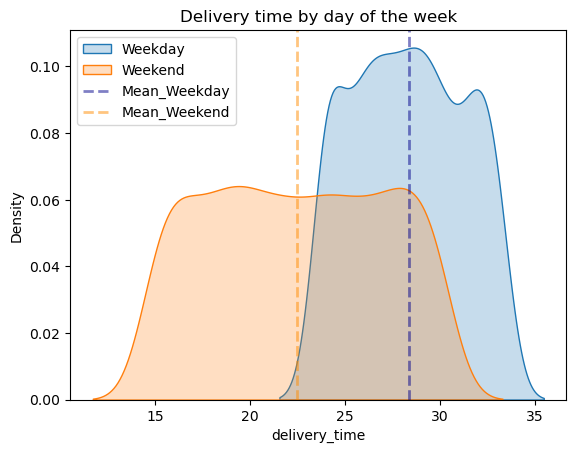

In [38]:
# iterate the distplot() function over the day of the week

# list of day of the week
day = ['Weekday', 'Weekend']

# iterate through day of the week
for i in day:
    subset = df[df['day_of_the_week'] == i]
    
# draw the density plot
    sns.distplot(subset['delivery_time'],  hist = False, kde = True,
                  kde_kws = {'shade':True},
                  label = i)

plt.axvline(x=df[df['weekday']==1]['delivery_time'].mean(), linewidth=2, color='darkblue', label="Mean_Weekday", alpha=0.5, linestyle='--')
plt.axvline(x=df[df['weekday']==0]['delivery_time'].mean(), linewidth=2, color='darkorange', label="Mean_Weekend", alpha=0.5, linestyle='--')
plt.legend()
plt.title('Delivery time by day of the week')

plt.show()

In [39]:
# print the values of the mean on weekdays and weekends

print('Delivery time on weekdays =',df[df['weekday']==1]['delivery_time'].mean())
print('Delivery time on weekends =',df[df['weekday']==0]['delivery_time'].mean())

Delivery time on weekdays = 28.340036563071298
Delivery time on weekends = 22.4700222057735


#### Observations:

We note that the delivery time during weekdays is overall higher than weekends. For instance, the  **mean delivery time on weekdays and weekends is 28.34mins and 22.4mins**, respectively.

The delivery time on weekends appears to be uniformly distributed, with support around 15 to 30 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* The dataset provided shows that FoodHub offers access to 14 cuisine types across New York.

* Most food orders for these restaurants take place over the weekend. Although the delivery time on weekends is on average shorter than weekdays, the waiting time may be longer during the weekend. Given that the range of minutes to deliver the food over the weekend is wider and varies uniformly from 15min to 30min, approximately.

* American, Japanese and Italian are the preferred cuisines among the available options.

### Recommendations:

* We suggest improving the range of the delivery time during the weekend, as currently it can take between 15min to 30min to deliver the food with almost equal likelihood.

* It is noted that the most popular cuisines, in terms of number of orders, are those with the highest ratings. We suggest understanding the factors that drive the minimum rating (with value of 3), in order to reduce this count and benefit more restaurants with its current promotional offer. For instance, FoodHub may want to incoporporate further metrics to measure customer satisfaction alongside ratings, such as food quality or portion size.

* We also suggest FoodHub to introduce promotional offers to restaurants with shorter food preparation times.

* Finally, the focus of marketing efforts could be geared towards the most popular cuisines to continue increasing the number of orders.

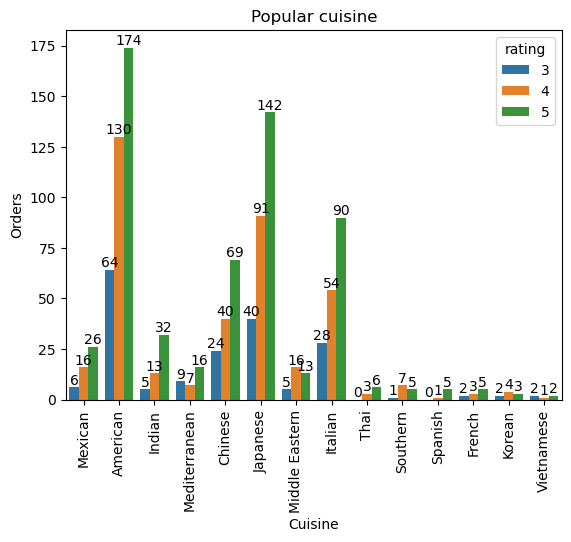

In [40]:
# appendix 1: We plot a chart of cuisine type vs rating (for orders that were given a rating)

popular_cuisine = sns.countplot(data = df_rating, x = 'cuisine_type', hue = 'rating')
plt.title('Popular cuisine')
plt.xlabel('Cuisine')
plt.xticks(rotation=90)
plt.ylabel('Orders')
popular_cuisine.bar_label(popular_cuisine.containers[0], label_type='edge')
popular_cuisine.bar_label(popular_cuisine.containers[1], label_type='edge')
popular_cuisine.bar_label(popular_cuisine.containers[2], label_type='edge')

plt.show()

In [41]:
# appendix 2: check if the ratings variable is correlated with any other quantitative variable

df_rating.corr()['rating'].sort_values()

weekday                 -0.030727
delivery_time           -0.009804
food_preparation_time   -0.006083
order_id                 0.006308
customer_id              0.007753
cost_of_the_order        0.033983
rating                   1.000000
Name: rating, dtype: float64

#### Observations:

There is not a correlation between rating and any of the other variables.

### Code written by C.AriasOrtega

---